In [1]:
import os

notebook_dir = os.getcwd()
base_dir = os.path.join(notebook_dir, '..')

os.chdir(base_dir)

# print(os.getcwd())

In [2]:
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook

In [31]:
from load_txt_datos import cargar_datos

file1 = 'U_superficie_80m_225.raw'
path1 = os.path.join(base_dir, 'data', file1)

x, y, z, u, v, w = cargar_datos('isosuperficie', path1)

minx, maxx = x.min(), x.max()
miny, maxy = y.min(), y.max()

file2 = 'U_superficie_81m_225.raw'
path2 = os.path.join(base_dir, 'data', file2)

x2, y2, z2, u2, v2, w2 = cargar_datos('isosuperficie', path2)

In [32]:
from scipy.interpolate import griddata

# Definición del dominio y densidad de la grilla
npois = 100
npoiX, npoiY = npois, npois

xg = np.linspace(minx, maxx, npoiX)
yg = np.linspace(minx, maxy, npoiY)

XG, YG = np.meshgrid(xg, yg)

# Interpolación de variables output de OF sobre la grilla regular
ZG = griddata((x, y), z, (XG, YG), method='linear')
UG = griddata((x, y), u, (XG, YG), method='linear')
VG = griddata((x, y), v, (XG, YG), method='linear')
WG = griddata((x, y), w, (XG, YG), method='linear')

ZG2 = griddata((x, y), z2, (XG, YG), method='linear')
UG2 = griddata((x, y), u2, (XG, YG), method='linear')
VG2 = griddata((x, y), v2, (XG, YG), method='linear')
WG2 = griddata((x, y), w2, (XG, YG), method='linear')


<IPython.core.display.Javascript object>


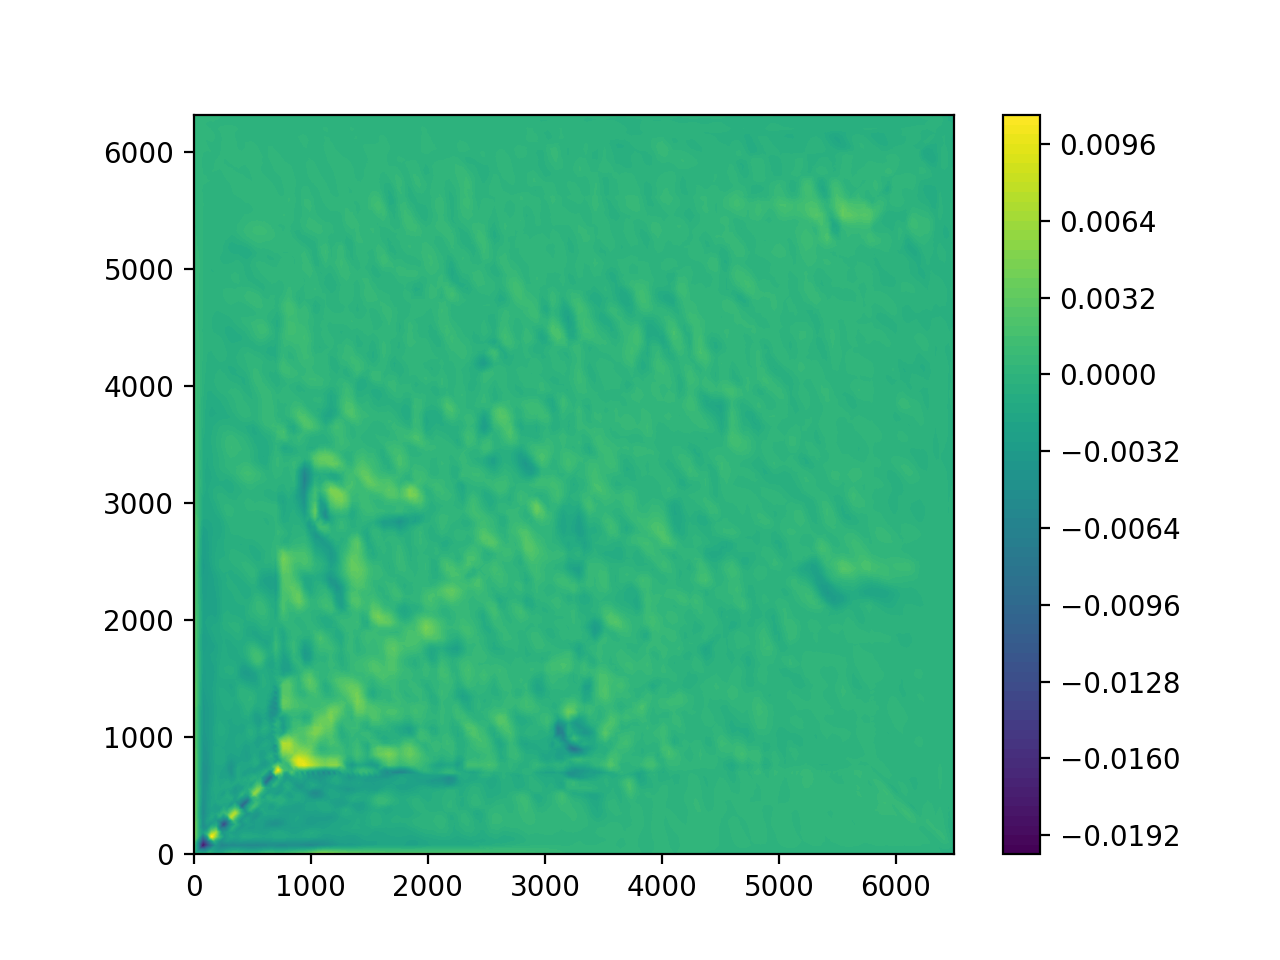

In [34]:
fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)

# count = ax.contourf(XG, YG, VG2-VG, 10)
count = ax.tricontourf(x, y, (w2-w)/w.max(), 100)
# ax.plot(*streamline, '.')

# for line in streamlines:
#     ax.plot(line[0], line[1], '.r')

    
# ax.streamplot(XG, YG, UG, VG, color='k', linewidth=.5)
fig1.colorbar(count)
ax.set_aspect('equal', 'box')